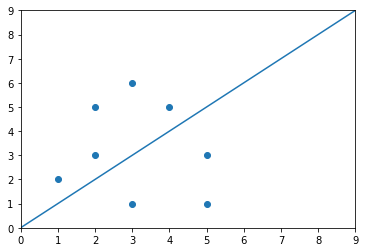

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import c_

sam = np.array([[1,2],[2,3],[2,5],[3,1],[3,6],[4,5],[5,1],[5,3]]) #设定初始的点位
#原始点位图
plt.scatter(sam[:,0], sam[:,1])
plt.plot([0,10],[0,10]) #初始拟合线y=x
plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

$$
Y=\begin{pmatrix} y_1 \\ y_2 \\ .\\.\\ y_n \end{pmatrix}_{nx1},
B=\begin{pmatrix} b \\ w \end{pmatrix}_{2x1},
\\
X = \begin{pmatrix} 1&x_1 \\ 1&x_2 \\ .\\ .\\ 1&x_n \end{pmatrix}_{nx2},
e = \begin{pmatrix} e_1 \\ e_2 \\ .\\.\\ e_n \end{pmatrix}_{nx1}
$$
So we have,
$$
Y = X \cdot B+e
\\
Q = (Y-X\cdot B)^T(Y-X\cdot B)
$$


#### Find the derivative of *Q*
$$
 \frac{\partial Q}{\partial B}=-X^TY+X^TXB=\begin{pmatrix} \frac{\partial Q}{\partial b} \\ \frac{\partial Q}{\partial w} \end{pmatrix}
$$

#### Then, change the B,
$$
B_{t+1} = B_t - lr *  \frac{\partial Q}{\partial B}
$$

In [221]:
#根据上面的公式分别求出Q对B的偏导、变化后的B、残差平方和Q
def deltaB(sam, B_init, lr=0.01):
    X = scipy.c_[np.ones(sam.shape[0]),sam[:,0]]
    Y = sam[:,1]
    Q = np.dot((Y - np.dot(X,B_init)).T,Y - np.dot(X,B_init))
    Q_B = -np.dot(X.T,Y) + np.dot(np.dot(X.T,X),B_init)
    B = B_init - lr * Q_B
    B_init = B
    
    return Q_B, B, Q

In [247]:
iter_num = 5000
B_init = np.array([0,1])
#以下三个_his用来存放每次生成的值
B_his = B_init
Q_B_his = np.array([0,0])
Q_his = []
for i in range(iter_num):
    sel = np.random.choice(sam.shape[0],5,replace=False) #随机挑选点
    Q_B,B,Q = deltaB(sam[sel], B_his.reshape(2,-1)[:,i])
    Q_B_his = scipy.c_[Q_B_his,Q_B]
    B_his = np.round(scipy.c_[B_his,B],4)
    Q_his.append(Q.tolist())

In [248]:
B_his #每一列代表一个B

array([[ 0.    , -0.01  ,  0.02  , ...,  3.6482,  3.6406,  3.6962],
       [ 1.    ,  0.85  ,  0.8458, ..., -0.2637, -0.3172, -0.0788]])

In [249]:
Q_B_his

array([[  0.    ,   1.    ,  -3.    , ...,   0.3985,   0.7581,  -5.555 ],
       [  0.    ,  15.    ,   0.42  , ...,   0.6205,   5.3515, -23.837 ]])

In [250]:
Q_his

[31.0,
 17.927,
 36.06748096,
 27.15457425,
 25.28594,
 37.09371968,
 36.833434690000004,
 34.43453076,
 19.07866364,
 19.18308682,
 24.80413332,
 21.928735509999996,
 28.026361989999998,
 26.501572789999997,
 26.52839732,
 14.341690869999997,
 20.3930496,
 18.877789890000003,
 38.75948793999999,
 16.98310197,
 25.85160556,
 8.2707336,
 26.049056309999997,
 24.772539400000003,
 31.534184450000005,
 37.107173280000005,
 19.16699824,
 17.210966079999995,
 32.40159453,
 8.32494085,
 24.008073359999997,
 25.15388481,
 22.656044449999996,
 27.427028050000004,
 23.306467010000002,
 24.193735089999997,
 18.34809507,
 32.31454069,
 21.12570139,
 18.106636500000004,
 18.243535870000002,
 34.39969007,
 28.577440600000003,
 21.91221309,
 17.35839069,
 24.518730259999998,
 22.02158592,
 16.982250450000002,
 30.120623560000006,
 22.984042370000004,
 24.44851279,
 13.647735,
 15.82236335,
 17.003135250000003,
 23.890571270000006,
 29.078291840000002,
 19.4666531,
 12.156567899999999,
 33.3647752,
 1

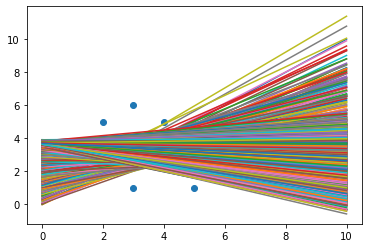

In [251]:
x=np.array([0,10])
y=B_his[0,0]+B_his[1,0]*x #y的初始值
for j in range(1,B_his.shape[1]):
    y = scipy.c_[y,B_his[0,j]+B_his[1,j]*x] #把每个B对应的y放到一起

plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y)
plt.show()

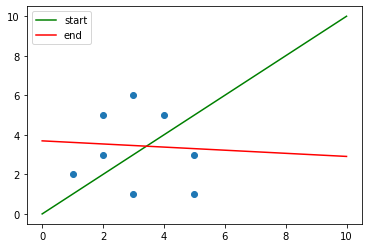

In [256]:
plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y[:,0],c='g',label='start') #最初始
plt.plot(x,y[:,y.shape[1]-1],c='r',label='end') #最终
plt.legend()

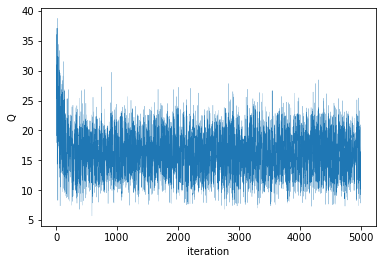

In [261]:
#Q残差平方和图
plt.plot(range(1,iter_num+1),Q_his,linewidth=0.2)
plt.xlabel('iteration')
plt.ylabel('Q')
plt.show()

In [ ]:
sca = plt.scatter(x,y ,c='red', alpha=0.5); plt.pause(0.05)
if 'sca' in globals(): sca.remove()